In [ ]:
!pip install flair

     |████████████████████████████████| 322 kB 5.4 MB/s 
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 788 kB 49.0 MB/s 
     |████████████████████████████████| 1.2 MB 50.3 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 981 kB 54.6 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.5 MB 51.0 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 38.9 MB/s 
     |████████████████████████████████| 596 kB 57.9 MB/s 
     |████████████████████████████████| 895 kB 57.7 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=ad8bc647bac3a195592b5afad92da068340c55e1a80183

In [ ]:
import flair



In [ ]:
dir(flair)

['AnnealOnPlateau',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cache_root',
 'data',
 'datasets',
 'device',
 'embedding_storage_mode',
 'embeddings',
 'file_utils',
 'hf_set_seed',
 'logger',
 'logging',
 'models',
 'nn',
 'optim',
 'os',
 'set_seed',
 'tokenization',
 'torch',
 'trainers',
 'training_utils',
 'visual']

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("offensive_vs_non_offensive_mini_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,clean_tweet,class,labels
0,0,look at what you just said lls new era girl ...,1,offensive
1,1,driving the fucktardmobile tranny slips and a...,1,offensive
2,2,if i ever put ma trust ina bitch i will alwa...,1,offensive
3,3,stop twatching me bitch,1,offensive
4,4,you know bitches be mad when they be lik...,1,offensive


In [ ]:
df['class'].value_counts()

1    3850
0     821
Name: class, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


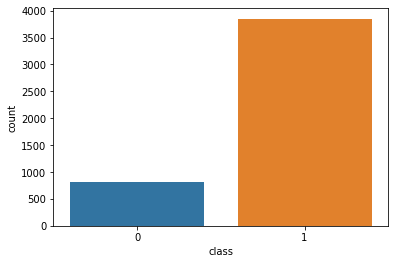

In [ ]:
sns.countplot(df['class'])

## Preparing dataset in CSV format

In [ ]:
df.columns

Index(['Unnamed: 0', 'clean_tweet', 'class', 'labels'], dtype='object')

In [ ]:
df1 = df[['clean_tweet',"labels"]]

In [ ]:
#Changing columns
df1.columns=["text","label"]

##Preparing Dataset in FastText format

In [ ]:
df_ftxt = df1.copy()

In [ ]:
df_ftxt['label'] = "__label__" + df_ftxt['label'].astype(str)

df_ftxt.head()

,text,label
0,look at what you just said lls new era girl ...,__label__offensive
1,driving the fucktardmobile tranny slips and a...,__label__offensive
2,if i ever put ma trust ina bitch i will alwa...,__label__offensive
3,stop twatching me bitch,__label__offensive
4,you know bitches be mad when they be lik...,__label__offensive


In [ ]:
df_ftxt = df_ftxt[["label","text"]]
df_ftxt.head()

,label,text
0,__label__offensive,look at what you just said lls new era girl ...
1,__label__offensive,driving the fucktardmobile tranny slips and a...
2,__label__offensive,if i ever put ma trust ina bitch i will alwa...
3,__label__offensive,stop twatching me bitch
4,__label__offensive,you know bitches be mad when they be lik...


##Splitting Dataset into 3 (Train, Test, Development) in CSV format

In [ ]:
train,test,dev = np.split(df1, [int(.6*len(df1)),int(.8*len(df1))])

In [ ]:
print(df1.shape)
print(train.shape)
print(test.shape)
print(dev.shape)

(4671, 2)
(2802, 2)
(934, 2)
(935, 2)


In [ ]:
#Creating a folder to store our splitted Data 
!mkdir -p data 

In [ ]:
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")
dev.to_csv("data/dev.csv")

In [ ]:
!ls data 

dev.csv  test.csv  train.csv


##Splitting Dataset into 3 (Train, Test, Development) in FastText format

In [ ]:
train_ftxt,test_ftxt,dev_ftxt = np.split(df_ftxt, [int(.6*len(df_ftxt)),int(.8*len(df_ftxt))])

In [ ]:
#Creating a folder to store our splitted Data 
!mkdir -p data_ftxt

In [ ]:
train_ftxt.to_csv("data_ftxt/train.csv",sep="\t", index=False, header=False)
test_ftxt.to_csv("data_ftxt/test.csv",sep="\t", index=False, header=False)
dev_ftxt.to_csv("data_ftxt/dev.csv",sep="\t", index=False, header=False)

In [ ]:
!ls data_ftxt

dev.csv  test.csv  train.csv


##Building Corpus 

In [ ]:
#CSVClassificationCorpus
#ClassificationCorpus
from flair.datasets import ClassificationCorpus, CSVClassificationCorpus
from flair.data import Corpus

For CSV

In [ ]:
df1.columns

Index(['text', 'label'], dtype='object')

In [ ]:
columns_name_mapping = {1:"text", 2:"label_topic"}

In [ ]:
#CSV files location 
data_csv_path = "data/"

In [ ]:

corpus_csv: Corpus = CSVClassificationCorpus(data_folder=data_csv_path, 
                                             column_name_map=columns_name_mapping,label_type='upos',
                                             skip_header=True, delimiter=',')


2022-02-10 13:42:25,728 Reading data from data
2022-02-10 13:42:25,731 Train: data/train.csv
2022-02-10 13:42:25,734 Dev: data/dev.csv
2022-02-10 13:42:25,735 Test: data/test.csv


In [ ]:
#FastText files location 
data_ftxt_path = "data_ftxt/"

In [ ]:
corpus_ftxt: Corpus = ClassificationCorpus(data_ftxt_path,label_type='upos')

2022-02-10 14:08:55,697 Reading data from data_ftxt
2022-02-10 14:08:55,702 Train: data_ftxt/train.csv
2022-02-10 14:08:55,706 Dev: data_ftxt/dev.csv
2022-02-10 14:08:55,712 Test: data_ftxt/test.csv
2022-02-10 14:08:55,877 Initialized corpus data_ftxt/ (label type name is 'upos')


In [ ]:
label_dict_csv = corpus_csv.make_label_dictionary(label_type='upos')

2022-02-10 14:09:06,154 Computing label dictionary. Progress:


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 2802/2802 [00:03<00:00, 933.47it/s] 

2022-02-10 14:09:09,362 Corpus contains the labels: upos (#2802)
2022-02-10 14:09:09,366 Created (for label 'upos') Dictionary with 3 tags: <unk>, offensive, non_offensive
